# Export Sales Analysis Project

Importing Libaries

In [59]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns

reading the generated export sales Data

In [3]:
export_data = pd.read_csv("ExportSales.csv")

displaying the first 5 rows of the data

In [4]:
export_data.head()

,ID,Date,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price
0,2529604,2019-04-28,Category5,267,30011006,612,IRQ,750,3334.8225
1,2529605,2019-04-29,Category5,302,30011006,514,BHR,400,3032.8240
2,2529606,2019-05-13,Category5,507,30011006,513,BHR,100,749.9520
3,2529607,2019-06-01,Category5,795,30011006,5,SYC,100,556.8170
4,2529608,2019-07-03,Category5,1184,30011006,560,AFG,20,39.4460


Looking at the columns in the Data

In [5]:
export_data.columns

Index(['ID', 'Date', 'Category', 'Invoice Number', 'Product Code',
       'Customer Code', 'Destenation', 'QTY', 'Total Price'],
      dtype='object')

### We observed that the data is a Time Series data, So it is best to make the "Date" column the index of the data

In [6]:
export_data = pd.read_csv("ExportSales.csv", index_col = 1)

In [7]:
export_data.head()

,ID,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price
Date,,,,,,,,
2019-04-28,2529604,Category5,267,30011006,612,IRQ,750,3334.8225
2019-04-29,2529605,Category5,302,30011006,514,BHR,400,3032.8240
2019-05-13,2529606,Category5,507,30011006,513,BHR,100,749.9520
2019-06-01,2529607,Category5,795,30011006,5,SYC,100,556.8170
2019-07-03,2529608,Category5,1184,30011006,560,AFG,20,39.4460


We can see that Our Date column is now the index of the data

Now we preview the information on the data

In [8]:
export_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7811 entries, 2019-04-28 to 2022-09-19
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              7811 non-null   int64  
 1   Category        7811 non-null   object 
 2   Invoice Number  7811 non-null   int64  
 3   Product Code    7811 non-null   int64  
 4   Customer Code   7811 non-null   int64  
 5   Destenation     7701 non-null   object 
 6   QTY             7811 non-null   int64  
 7   Total Price     7811 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 549.2+ KB


There is a Null Values in the data for the Destination, Morealso, We have Different Data types in the data such as
* Integers
* Object or Strings
* Floats

In [9]:
export_data.columns

Index(['ID', 'Category', 'Invoice Number', 'Product Code', 'Customer Code',
       'Destenation', 'QTY', 'Total Price'],
      dtype='object')

    * ID
    The ID columns represent the identity number of the sales. The number are unique to each sales
    * Category
    The Category columns represent the type or category the sales belongs to
    * Invoice Number
    Also a unique number of the transaction
    * Product Code
    The The identity of the product purchased
    * Customer Code
    More Like the Identity of the Customer
    * Destination not destenation [needs cleaning]
    Where the product is destined to
    * QTY == Quantity
    This represent number of product sold/bought
    * Total Price
    The Total Amount of the Product sold
    

In [10]:
from csv import reader

In [11]:
open_csv = open('ExportSales.csv')
read_csv = reader(open_csv)
list_csv = list(read_csv)
list_export_data = list_csv

list_export_data[0]

['ID',
 'Date',
 'Category',
 'Invoice Number',
 'Product Code',
 'Customer Code',
 'Destenation',
 'QTY',
 'Total Price']

In [12]:
#df.rename(columns = {'team':'team_name', 'points':'points_scored'}, inplace = True)
export_data.rename(columns = {'Destenation': 'Destination'}, inplace = True)

In [13]:
export_data.head()

,ID,Category,Invoice Number,Product Code,Customer Code,Destination,QTY,Total Price
Date,,,,,,,,
2019-04-28,2529604,Category5,267,30011006,612,IRQ,750,3334.8225
2019-04-29,2529605,Category5,302,30011006,514,BHR,400,3032.8240
2019-05-13,2529606,Category5,507,30011006,513,BHR,100,749.9520
2019-06-01,2529607,Category5,795,30011006,5,SYC,100,556.8170
2019-07-03,2529608,Category5,1184,30011006,560,AFG,20,39.4460


#### We have renamed the Destenation to Destination

Let start by reviewing our "Category" columns, How many categories of items do we have

In [14]:
export_data["Category"].unique()

array(['Category5', 'Category6', 'Category4', 'Category3', 'Category8',
       'Category7', 'Category2', 'Category1', 'Category9', 'Category10'],
      dtype=object)

#### We have 10 categories of exported sales


### Which Category has the most sales

In [15]:
export_data["Category"].value_counts()

Category4     3731
Category7     1667
Category8      869
Category2      649
Category6      454
Category5      302
Category9       54
Category1       42
Category3       39
Category10       4
Name: Category, dtype: int64

#### The 4TH category has the most sales of 3731

#### The 10TH category has the least sales of 4

### Lets create a new column to our data set. The "Year" column. This Only include the year of the Export sales.


In [16]:
export_data.index

Index(['2019-04-28', '2019-04-29', '2019-05-13', '2019-06-01', '2019-07-03',
       '2019-07-28', '2019-07-28', '2019-10-02', '2019-10-02', '2019-10-12',
       ...
       '2022-09-14', '2022-09-14', '2022-09-14', '2022-09-14', '2022-09-14',
       '2022-09-14', '2022-09-14', '2022-09-19', '2022-09-19', '2022-09-19'],
      dtype='object', name='Date', length=7811)

In [17]:
export_data['Year'] = export_data.index.str[0:4]

In [18]:
export_data.head()

,ID,Category,Invoice Number,Product Code,Customer Code,Destination,QTY,Total Price,Year
Date,,,,,,,,,
2019-04-28,2529604,Category5,267,30011006,612,IRQ,750,3334.8225,2019
2019-04-29,2529605,Category5,302,30011006,514,BHR,400,3032.8240,2019
2019-05-13,2529606,Category5,507,30011006,513,BHR,100,749.9520,2019
2019-06-01,2529607,Category5,795,30011006,5,SYC,100,556.8170,2019
2019-07-03,2529608,Category5,1184,30011006,560,AFG,20,39.4460,2019


In [19]:
# shift column 'Year' to first position
first_column = export_data.pop('Year')



In [20]:
# insert column using insert(position,column_name,
# first_column) function
export_data.insert(0, 'Year', first_column)

In [21]:
export_data.head()

,Year,ID,Category,Invoice Number,Product Code,Customer Code,Destination,QTY,Total Price
Date,,,,,,,,,
2019-04-28,2019,2529604,Category5,267,30011006,612,IRQ,750,3334.8225
2019-04-29,2019,2529605,Category5,302,30011006,514,BHR,400,3032.8240
2019-05-13,2019,2529606,Category5,507,30011006,513,BHR,100,749.9520
2019-06-01,2019,2529607,Category5,795,30011006,5,SYC,100,556.8170
2019-07-03,2019,2529608,Category5,1184,30011006,560,AFG,20,39.4460


Now, Our New column head is now created. Lets see which year had more sales

In [22]:
export_data["Year"].unique()

array(['2019', '2020', '2021', '2022'], dtype=object)

We have four years range from 2019 to 2022

In [24]:
export_data["Year"].value_counts()

2021    3054
2022    2572
2020    1249
2019     936
Name: Year, dtype: int64

We Had more sales in the Year 2021

### NOW SEE HOW MANY COUNTRIES WERE THE SALES EXPORTED TO IN THE DESTINATION COLUMN

In [29]:
export_data['Destination'].unique()

array(['IRQ', 'BHR', 'SYC', 'AFG', 'AZE', 'PAK', 'UAE', 'QAT', 'RUS',
       'DEU', 'LKA', 'KEN', 'AUS', 'TKM', 'KWT', 'ZAF', 'CAN', 'MYS',
       'DJI', 'CHN', 'NLD', 'OMN', 'LBN', 'MUS', 'ROU', 'FIN', nan, 'MDV',
       'SWE', 'UKR', 'KGZ'], dtype=object)

#### WE have null (nan) values in the Destination Column. It is Best We replace the NaN with "Unknown" Destination So That we can better understand that the destination for that sale is unknown or not recorded during the transaction

In [33]:
export_data["Destination"].fillna("Unknown", inplace = True)

Now we check if we still have Nan Values

In [40]:
export_data['Destination'].unique()

array(['IRQ', 'BHR', 'SYC', 'AFG', 'AZE', 'PAK', 'UAE', 'QAT', 'RUS',
       'DEU', 'LKA', 'KEN', 'AUS', 'TKM', 'KWT', 'ZAF', 'CAN', 'MYS',
       'DJI', 'CHN', 'NLD', 'OMN', 'LBN', 'MUS', 'ROU', 'FIN', 'Unknown',
       'MDV', 'SWE', 'UKR', 'KGZ'], dtype=object)

In [46]:
countries = export_data['Destination'].unique()
len(countries)

31

### Now, We know that we Have 30 countries as the export sales destination and unknown countries too 

We now want to know the countries the highest and lowest number of export sales according to the data 

In [47]:
export_data['Destination'].value_counts()

IRQ        4441
BHR         479
PAK         424
AZE         400
AFG         351
OMN         291
UAE         248
AUS         160
TKM         134
KWT         119
Unknown     110
RUS          82
DEU          77
SYC          65
FIN          61
LBN          56
MYS          51
CAN          34
ZAF          32
UKR          28
CHN          26
NLD          26
LKA          26
DJI          24
ROU          21
QAT          16
KGZ          11
KEN          10
MUS           4
MDV           3
SWE           1
Name: Destination, dtype: int64

### IRQ (Iraq) has the highest number of Sales Exportation of 4441 sales
### While SWE (Sweden) has the lower number of Sales Exportation of 1 sale

### Morealso, 110 Product sales were exported to Unknown countries

Which country Ordered the most Quantity

In [51]:
export_data["QTY"].max()

5586

In [52]:
export_data[export_data["QTY"] == 5586]

,Year,ID,Category,Invoice Number,Product Code,Customer Code,Destination,QTY,Total Price
Date,,,,,,,,,
2022-06-19,2022,2536507,Category7,89,30006003,603,AZE,5586,38369.1168


AZE (Azerbaijan) Purchased the most quantity of a product

Which Country Has the highest total price

In [54]:
export_data['Total Price'].max()

77532.0

In [55]:
export_data[export_data["Total Price"] == 77532.0]

,Year,ID,Category,Invoice Number,Product Code,Customer Code,Destination,QTY,Total Price
Date,,,,,,,,,
2022-05-31,2022,2536353,Category4,62,30001350,33,ROU,3500,77532.0


ROU (Romania) Has the highest Total price

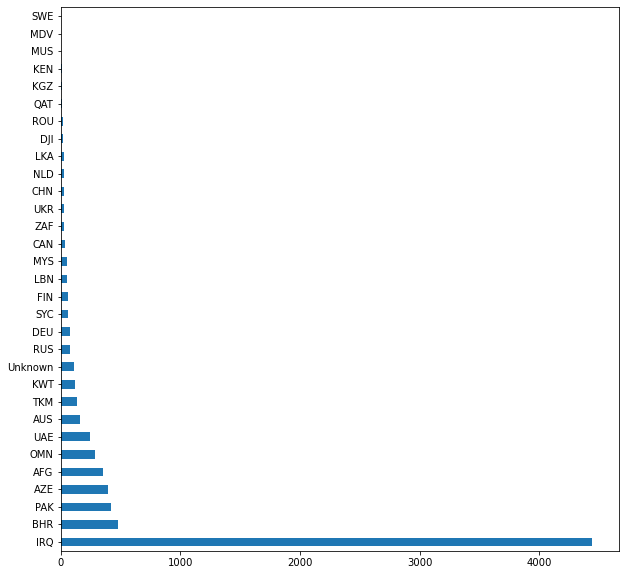

In [73]:
Destination =  export_data['Destination'].value_counts().plot(kind = 'barh', figsize=(10, 10))
